In [4]:
from scipy.io import loadmat
faces = loadmat('faces.mat')['Data']
n, p = faces.shape
sample_face = faces[0,:]

(-0.5, 95.5, 95.5, -0.5)

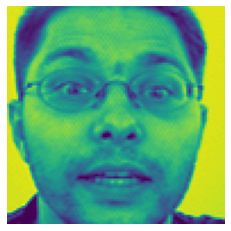

In [5]:
import matplotlib.pyplot as plt
img = sample_face.T.reshape(96,96)
plt.imshow(img, cmap = 'viridis')
plt.axis('off')

In [29]:
def Gaussian(data):
    from scipy.ndimage import gaussian_filter
    import numpy as np

    result = gaussian_filter(data.astype(float), sigma=5)
    img_result = result.T.reshape(96,96)

    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,2))
    img = sample_face.T.reshape(96,96)
    axs[0].imshow(img, cmap = 'viridis')
    axs[0].axis('off')
    axs[1].imshow(img_result, cmap = 'viridis')
    axs[1].axis('off')
    
    return result

array([174.61453079, 173.56649539, 171.45147074, ...,  13.85287281,
        13.42349478,  13.19423078])

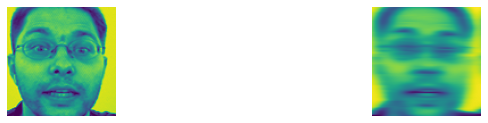

In [30]:
Gaussian(sample_face)

In [31]:
def laplacian_Gaussian(data):
    from scipy.ndimage import gaussian_laplace

    kernel = gaussian_laplace(data.astype(float), sigma=5)
    result = data + kernel

    img_kernel = kernel.T.reshape(96,96)
    img_result = result.T.reshape(96,96)

    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12,2))
    img = data.T.reshape(96,96)
    axs[0].imshow(img, cmap = 'viridis')
    axs[0].axis('off')
    axs[1].imshow(img_kernel, cmap = 'viridis')
    axs[1].axis('off')
    axs[2].imshow(img_result, cmap = 'viridis')
    axs[2].axis('off')
    
    return result

array([180.95265863, 181.93276213, 180.90111609, ...,   8.14846075,
         5.20211381,   5.23112948])

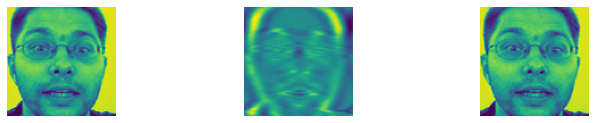

In [32]:
laplacian_Gaussian(sample_face)

In [33]:
def laplacian_Gaussian_alt(data):
    from skimage.filters import laplace

    edge = laplace(data.astype(float))
    result = data + edge

    img_edge = edge.T.reshape(96,96)
    img_result = result.T.reshape(96,96)

    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12,2))
    img = data.T.reshape(96,96)
    axs[0].imshow(img, cmap = 'viridis')
    axs[0].axis('off')
    axs[1].imshow(img_edge, cmap = 'viridis')
    axs[1].axis('off')
    axs[2].imshow(img_result, cmap = 'viridis')
    axs[2].axis('off')
    
    return result

array([181., 185., 181., ...,   7.,   2.,   5.])

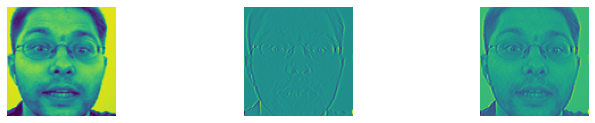

In [34]:
laplacian_Gaussian_alt(sample_face)

(-0.5, 95.5, 95.5, -0.5)

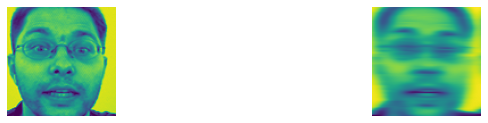

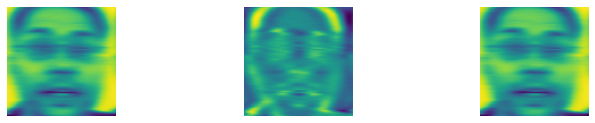

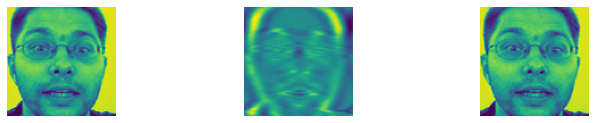

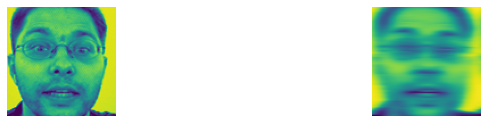

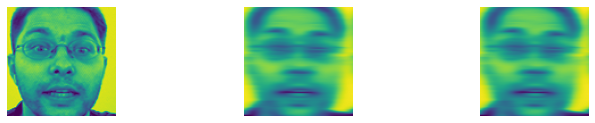

In [35]:
result_blur_sharpen = laplacian_Gaussian(Gaussian(sample_face))
result_sharpen_blur = Gaussian(laplacian_Gaussian(sample_face))

img1 = result_blur_sharpen.T.reshape(96,96)
img2 = result_sharpen_blur.T.reshape(96,96)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12,2))
img = sample_face.T.reshape(96,96)
axs[0].imshow(img, cmap = 'viridis')
axs[0].axis('off')
axs[1].imshow(img1, cmap = 'viridis')
axs[1].axis('off')
axs[2].imshow(img2, cmap = 'viridis')
axs[2].axis('off')

In [36]:
sum(img1.flatten() - img2.flatten())

-3.538502824085299e-12

In [37]:
sum(sample_face.flatten() - img1.flatten())

30.10754973179872

In [38]:
sum(sample_face.flatten() - img2.flatten())

30.10754973179499

## Conclusion:
The last row in the above plot shows, in order:

(1) the original face image, 

(2) the image after the blur filter and then the sharpening filter

(3) the image after the sharpening filter and then the blur filter

As calculated above, the distance between (2) and (3) is very small (-3.538502824085299e-12) and almost negligible. Thus, this experiment verified that reversing the order of applying the blur filter and the sharpening filter does not change the resulting image. In other words, the convolution operator is commutative.  

Furthermore (and more importantly), (2) and (3) are different from (1) given the calculations above. Thus, we can conclude that the composition of the blurring filter and the sharpening filter does not give us the identity operator. 


## the inverse of Gaussian filter (blurring):
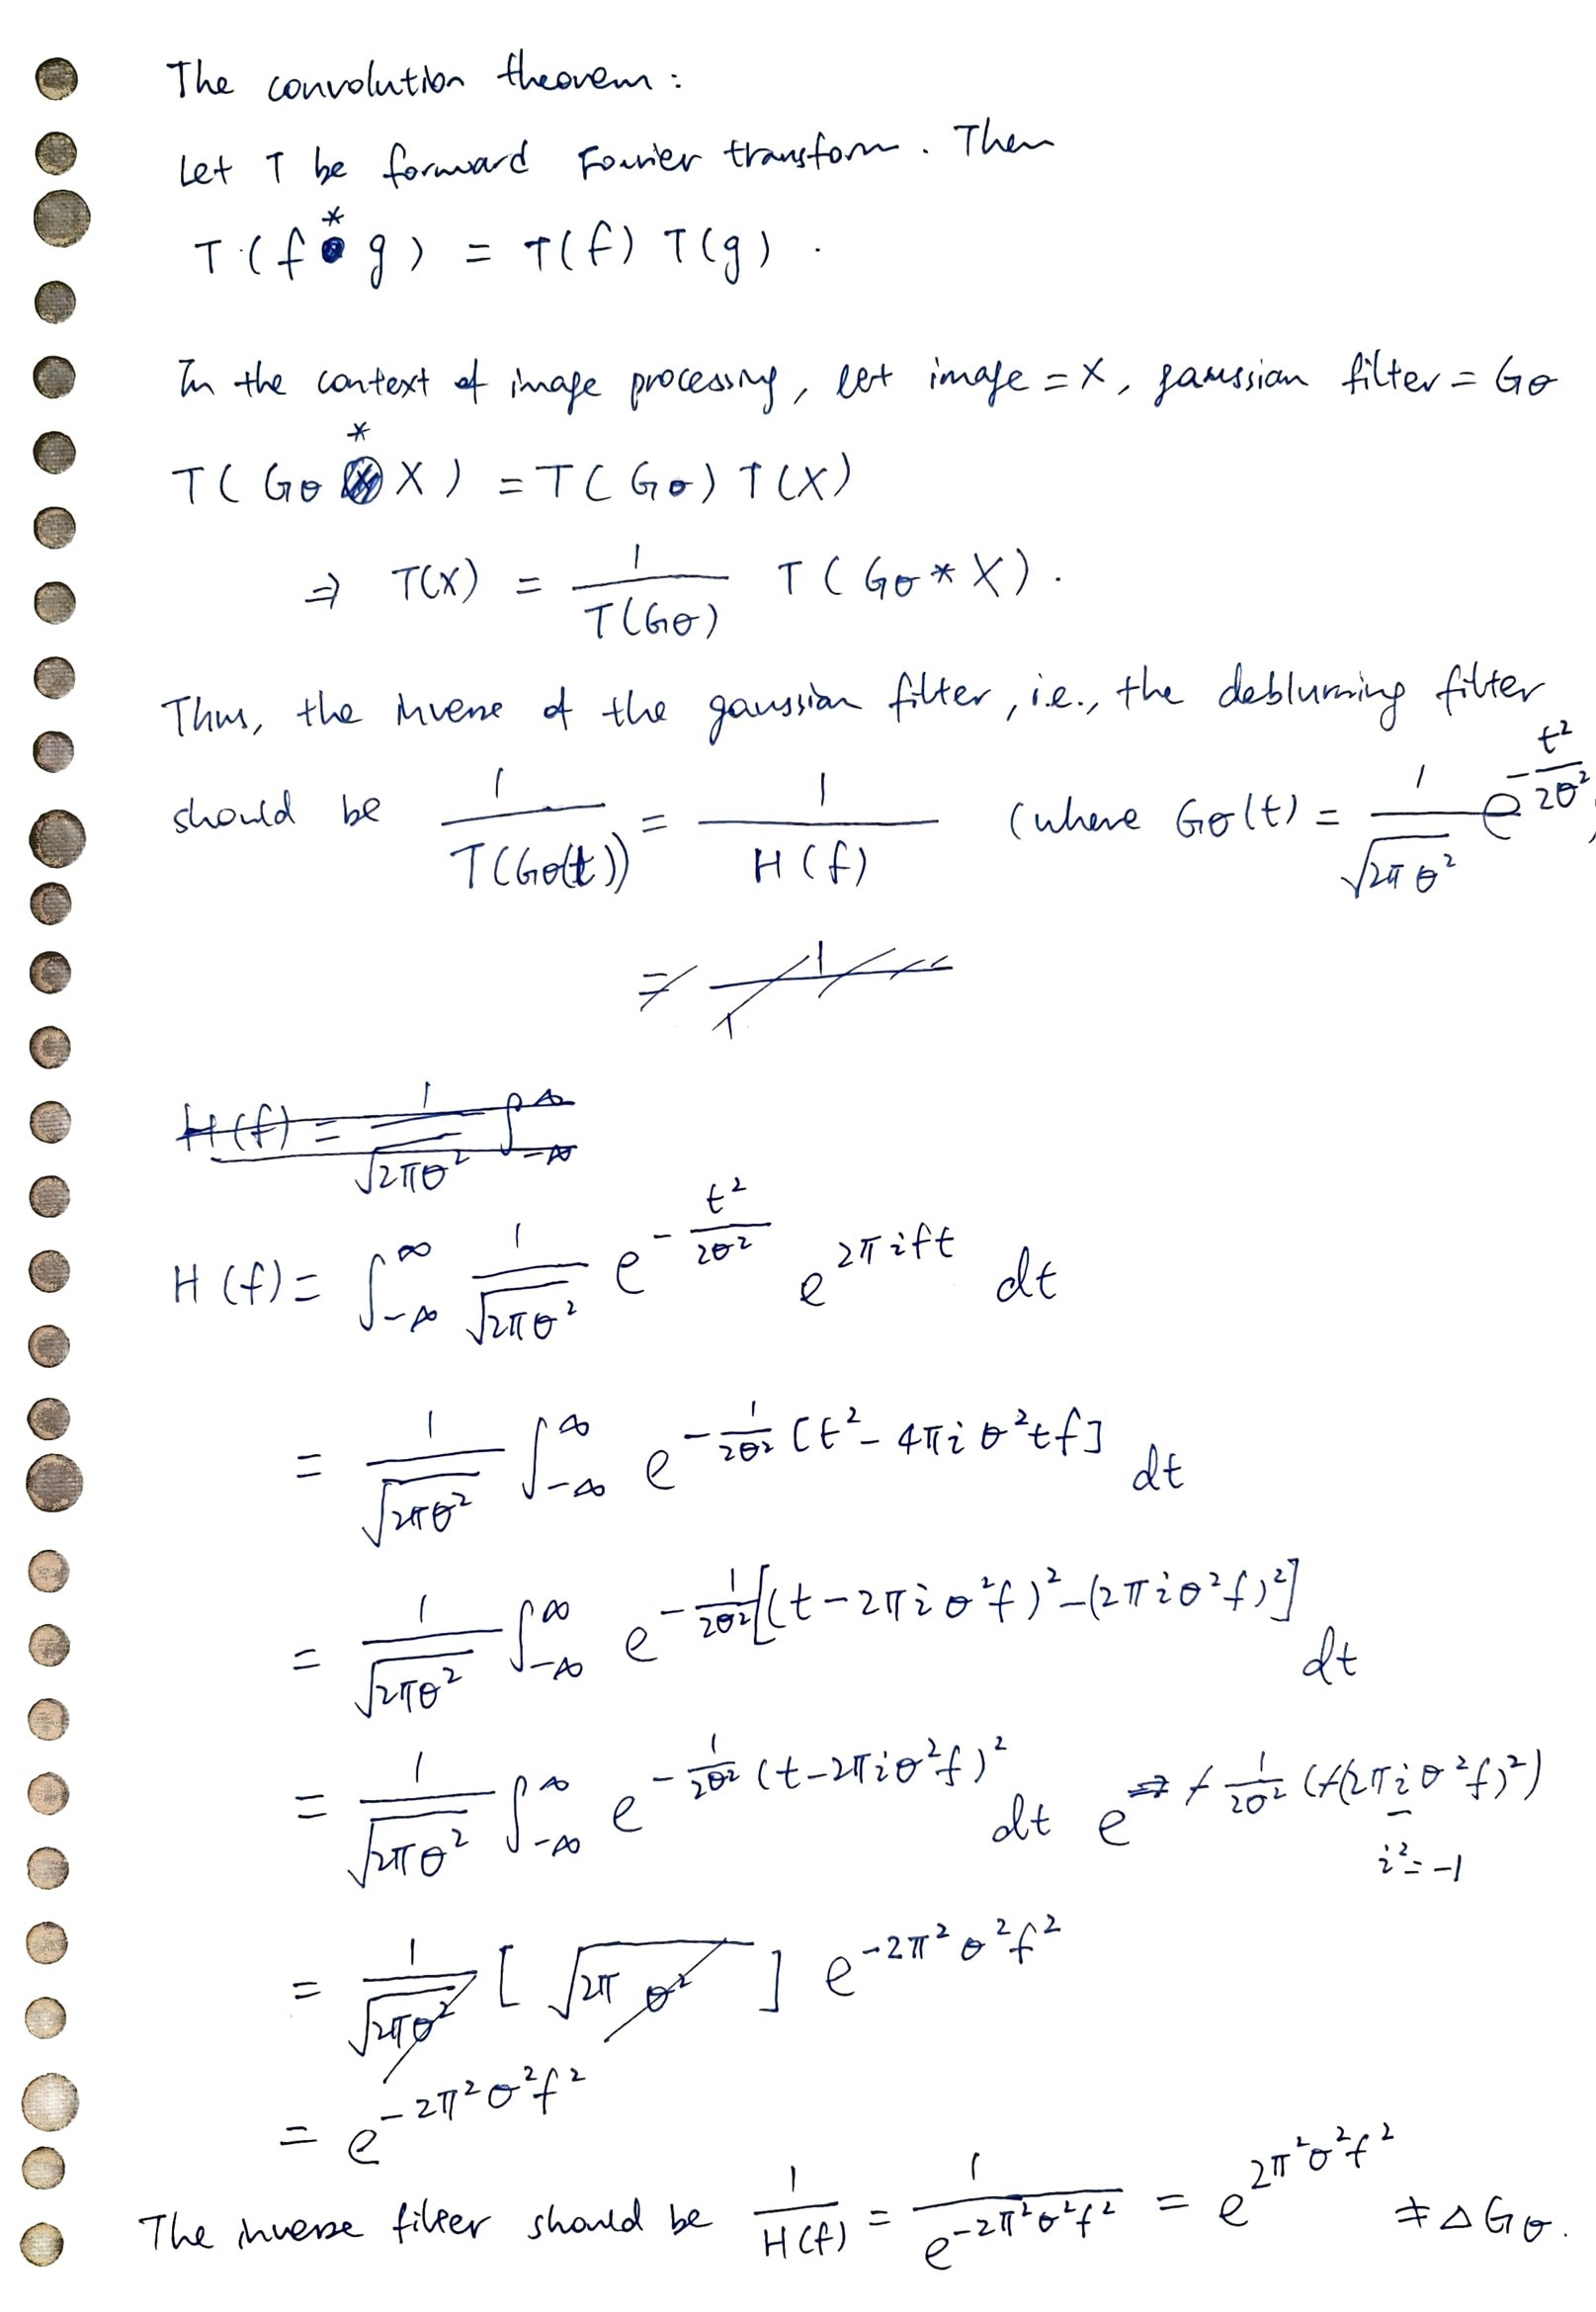

## Proof: convolution is commutative: 
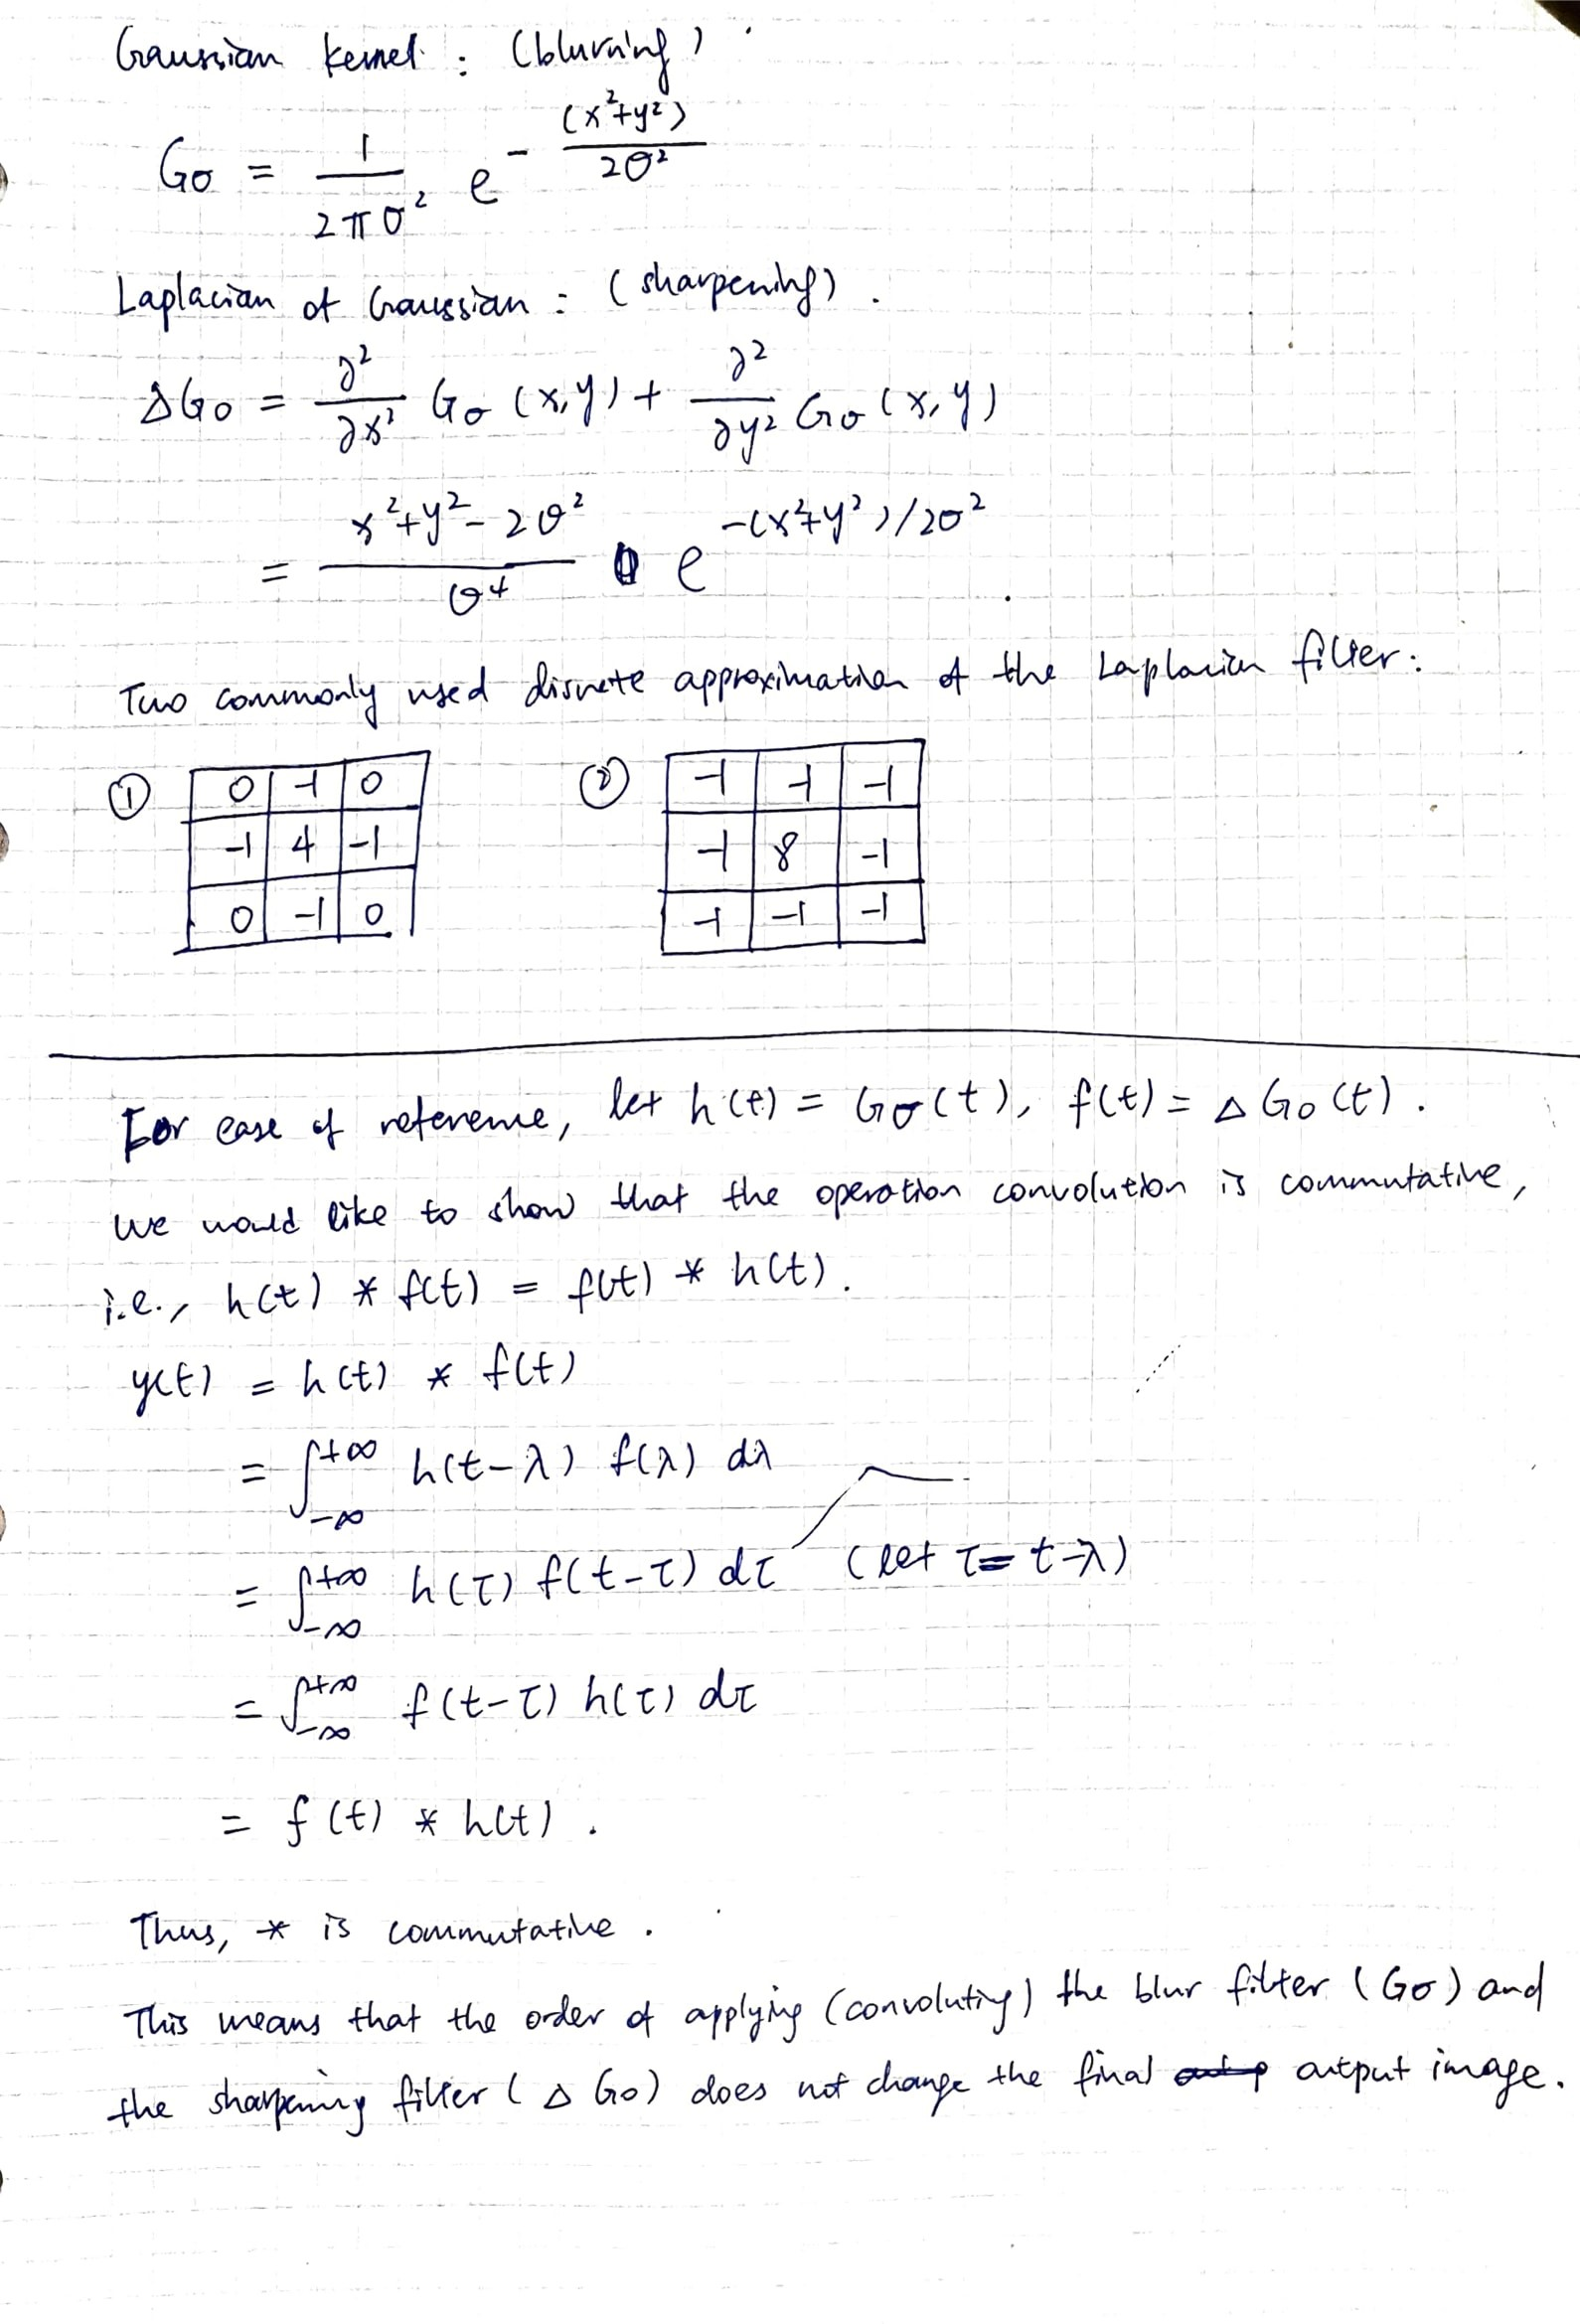